**Importing hub to get access to Leeds Sports Pose Dataset**

In [1]:
!pip install "hub[all]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 15.2 MB/s 
     |████████████████████████████████| 6.6 MB 32.3 MB/s 
     |████████████████████████████████| 132 kB 90.4 MB/s 
     |████████████████████████████████| 76 kB 7.2 MB/s 
     |████████████████████████████████| 28.2 MB 1.2 MB/s 
     |████████████████████████████████| 152 kB 99.5 MB/s 
     |████████████████████████████████| 7.8 MB 82.0 MB/s 
     |████████████████████████████████| 105 kB 99.1 MB/s 
     |████████████████████████████████| 2.0 MB 85.2 MB/s 
     |████████████████████████████████| 114 kB 103.7 MB/s 
     |████████████████████████████████| 76 kB 6.3 MB/s 
     |████████████████████████████████| 9.0 MB 64.2 MB/s 
     |████████████████████████████████| 79 kB 10.7 MB/s 
     |████████████████████████████████| 127 kB 102.5 MB/s 
     |████████████████████████████████| 52 kB 1.6 MB/s 
     |██████████████████████████████

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import hub
import cv2
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

In [2]:
# To increase size of plots
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [5, 5]

In [3]:
# Joint Names per position
joints = ["Right ankle", "Right knee", "Right hip", "Left hip", "Left knee", "Left ankle", "Right wrist", "Right elbow", "Right shoulder", "Left shoulder", "Left elbow", "Left wrist", "Neck", "Head top"]

**Loading in 1000 Training and Testing Images with their respective joints**

In [4]:
hub_tr = hub.load("hub://activeloop/lsp-train")
hub_ts = hub.load("hub://activeloop/lsp-test")

# Creating my own dicts to more easily work with the data
LSP_train = {"images": hub_tr["images"][:].numpy(aslist = True), 
             "joints": hub_tr["keypoints"][:].numpy(aslist = True), 
             "images_visualized": hub_tr["images_visualized"][:].numpy(aslist = True)}

LSP_test = {"images": hub_ts["images"][:].numpy(aslist = True), 
            "joints": hub_ts["keypoints"][:].numpy(aslist = True), 
            "images_visualized": hub_ts["images_visualized"][:].numpy(aslist = True)}

hub://activeloop/lsp-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train
hub://activeloop/lsp-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-test


**Shifting joint positions to fit original image dimensions**

In [5]:
# Converting list to np array
LSP_train["joints"] = np.asarray(LSP_train["joints"])
LSP_test["joints"] = np.asarray(LSP_test["joints"])

# Joints seem to be fit for the images with visualized joints, therefore I need to rescale to fit the original images (which are smaller)
# The X and Y scaling factor is 0.566 on average (from larger visualized to smaller originals)
LSP_train["joints"] = LSP_train["joints"][:, :, 0: 2] * 0.566
LSP_test["joints"] = LSP_test["joints"][:, :, 0: 2] * 0.566

**Plotting example image with labeled joints**

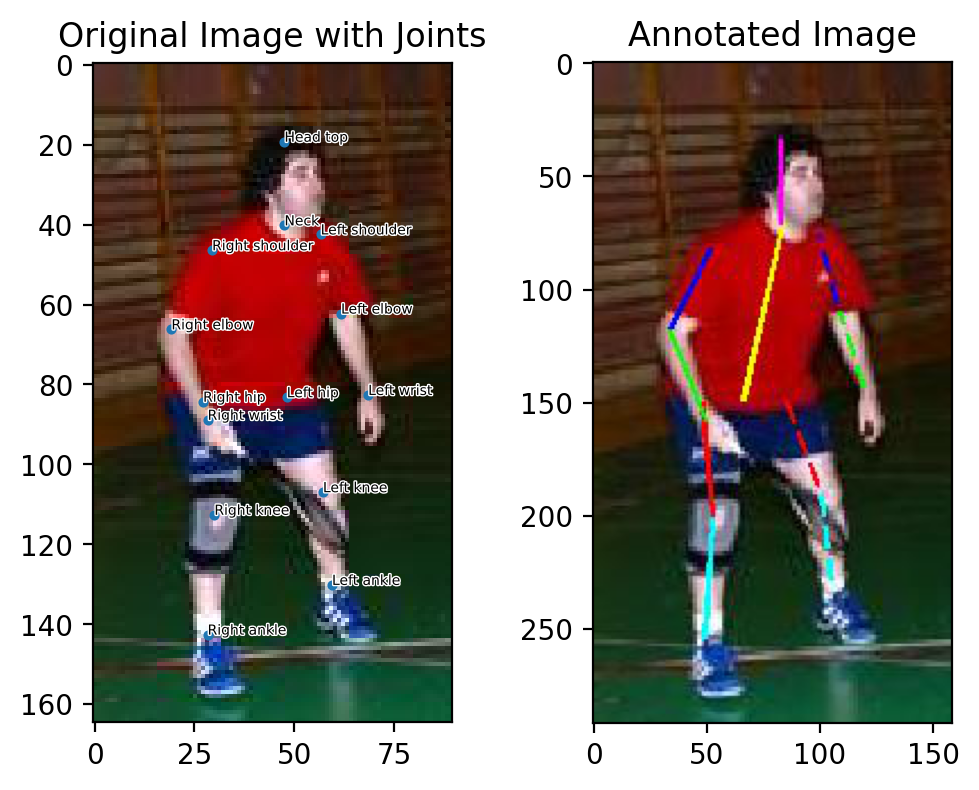

In [6]:
# Change num to affect visualizing original and normalized example
picture_num = 76

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

ax1.imshow(LSP_train["images"][picture_num])
ax1.scatter(LSP_train["joints"][picture_num, :, 0], LSP_train["joints"][picture_num, :, 1], s = 7)
ax1.set_title("Original Image with Joints")

ax2.imshow(LSP_train["images_visualized"][picture_num])
ax2.set_title("Annotated Image")

for pos, joint in enumerate(joints):
  ax1.annotate(joint, (LSP_train["joints"][picture_num, :, 0][pos], LSP_train["joints"][picture_num, :, 1][pos]), 
               fontsize = 5, path_effects = [PathEffects.withStroke(linewidth = 1, foreground = "w")])

fig.tight_layout()

**Normalizing images**

In [7]:
# First scaling x,y pos of joints to new resized 220x220 image, based on x,y scaling performed per image
# Needs to be done individually since originals have varying len/width

# TRAIN
for pos in range(1000):
  # Multiply scaling to x,y pairs of joints
  x_scale = 220 / LSP_train["images"][pos].shape[1]
  y_scale = 220 / LSP_train["images"][pos].shape[0]

  LSP_train["joints"][pos] *= [x_scale, y_scale]

# TEST
for pos in range(1000):
  # Multiply scaling to x,y pairs of joints
  x_scale = 220 / LSP_test["images"][pos].shape[1]
  y_scale = 220 / LSP_test["images"][pos].shape[0]

  LSP_test["joints"][pos] *= [x_scale, y_scale]

In [8]:
# Next transforming all images to 220x220, in which joints will be scaled to fit

# TRAIN
for pos in range(1000):
  LSP_train["images"][pos] = cv2.resize(LSP_train["images"][pos], (220, 220))

LSP_train["images"] = np.asarray(LSP_train["images"])

# TEST
for pos in range(1000):
  LSP_test["images"][pos] = cv2.resize(LSP_test["images"][pos], (220, 220))

LSP_test["images"] = np.asarray(LSP_test["images"])

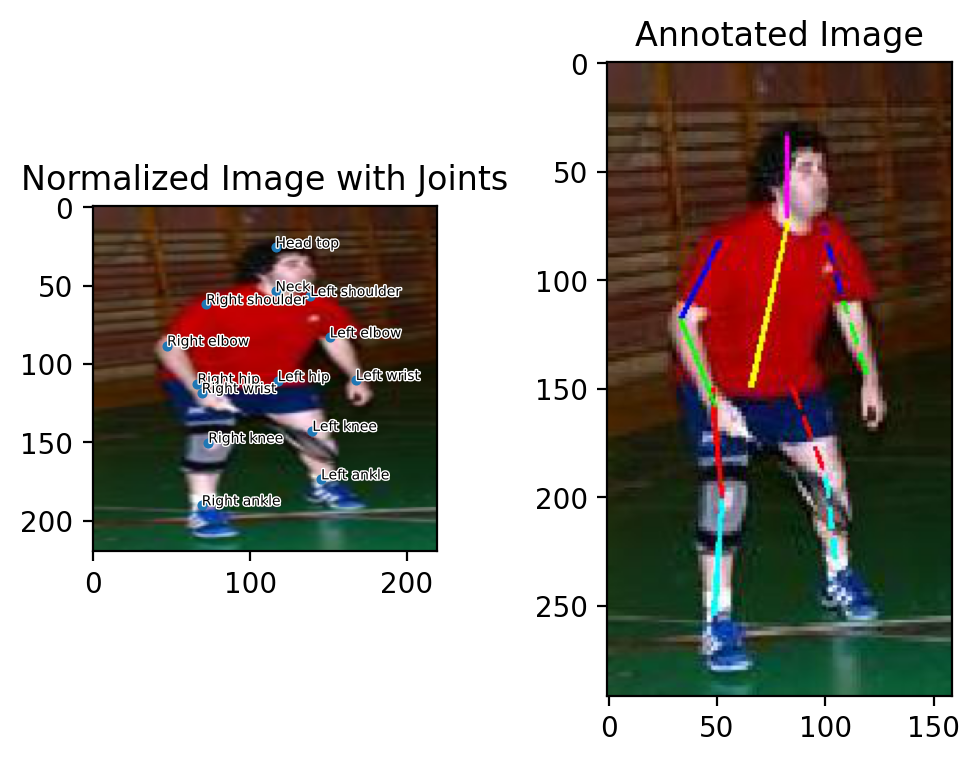

In [9]:
# Finally plotting
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

ax1.imshow(LSP_train["images"][picture_num])
ax1.scatter(LSP_train["joints"][picture_num, :, 0], LSP_train["joints"][picture_num, :, 1], s = 7)
ax1.set_title("Normalized Image with Joints")

ax2.imshow(LSP_train["images_visualized"][picture_num])
ax2.set_title("Annotated Image")

for pos, joint in enumerate(joints):
  ax1.annotate(joint, (LSP_train["joints"][picture_num, :, 0][pos], LSP_train["joints"][picture_num, :, 1][pos]), 
               fontsize = 5, path_effects = [PathEffects.withStroke(linewidth = 1, foreground = "w")])

fig.tight_layout()

**Creating Model**

In [108]:
model = keras.models.Sequential([keras.layers.Conv2D(48, 11, (4, 4), padding = "same", input_shape=(220, 220, 3)), 
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.ReLU(), 
                                 keras.layers.Conv2D(128, 5, (2, 2), padding = "same"), 
                                 keras.layers.BatchNormalization(), 
                                 keras.layers.ReLU(), 
                                 keras.layers.Conv2D(192, 3, (2, 2), padding = "same", activation = "relu"), 
                                 keras.layers.Conv2D(192, 3, (1, 1), padding = "same", activation = "relu"), 
                                 keras.layers.Conv2D(192, 3, (1, 1), padding = "same", activation = "relu"), 
                                 keras.layers.MaxPooling2D(), 
                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(4096, activation = "relu"), 
                                 keras.layers.Dropout(0.4), 
                                 keras.layers.Dense(4096, activation = "relu"), 
                                 keras.layers.Dropout(0.4), 
                                 keras.layers.Dense(28, activation = "linear")])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 55, 55, 48)        17472     
                                                                 
 batch_normalization_10 (Bat  (None, 55, 55, 48)       192       
 chNormalization)                                                
                                                                 
 re_lu_12 (ReLU)             (None, 55, 55, 48)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 128)       153728    
                                                                 
 batch_normalization_11 (Bat  (None, 28, 28, 128)      512       
 chNormalization)                                                
                                                                 
 re_lu_13 (ReLU)             (None, 28, 28, 128)      

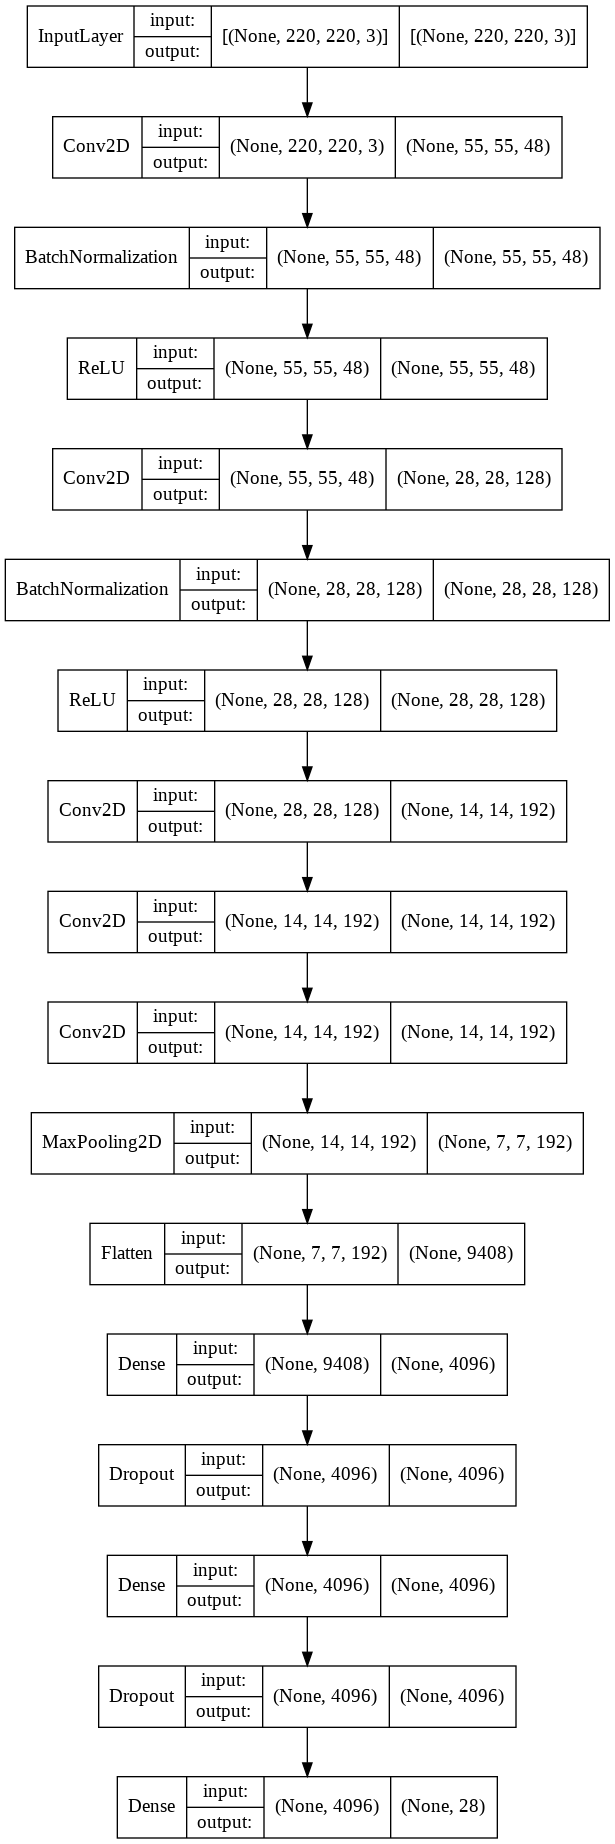

In [109]:
# Print the model summary
model.compile(loss = keras.losses.mse, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005), metrics = ["accuracy"])
model.summary()
keras.utils.plot_model(model, show_layer_names = False, show_shapes = True)

**Fitting Model**

In [110]:
history = model.fit(LSP_train["images"], LSP_train["joints"].reshape((1000, 28)), epochs = 1000)

Epoch 1/1000
32/32 [==============================] - 1s 21ms/step - loss: 8179.8643 - accuracy: 0.4090
Epoch 2/1000
32/32 [==============================] - 1s 20ms/step - loss: 1327.9634 - accuracy: 0.4460
Epoch 3/1000
32/32 [==============================] - 1s 20ms/step - loss: 1139.1285 - accuracy: 0.4720
Epoch 4/1000
32/32 [==============================] - 1s 21ms/step - loss: 1121.8831 - accuracy: 0.4500
Epoch 5/1000
32/32 [==============================] - 1s 21ms/step - loss: 1103.4413 - accuracy: 0.4640
Epoch 6/1000
32/32 [==============================] - 1s 21ms/step - loss: 1089.6451 - accuracy: 0.4820
Epoch 7/1000
32/32 [==============================] - 1s 20ms/step - loss: 1070.2816 - accuracy: 0.4600
Epoch 8/1000
32/32 [==============================] - 1s 21ms/step - loss: 1087.5103 - accuracy: 0.4580
Epoch 9/1000
32/32 [==============================] - 1s 21ms/step - loss: 1083.7277 - accuracy: 0.4410
Epoch 10/1000
32/32 [==============================] - 1s 21ms/s

In [111]:
score = model.evaluate(LSP_test["images"], LSP_test["joints"].reshape((1000, 28)), verbose = 0)
print(f"Test loss: {score[0]}, Test accuracy: {score[1]}")

Test loss: 868.5184326171875, Test accuracy: 0.46399998664855957


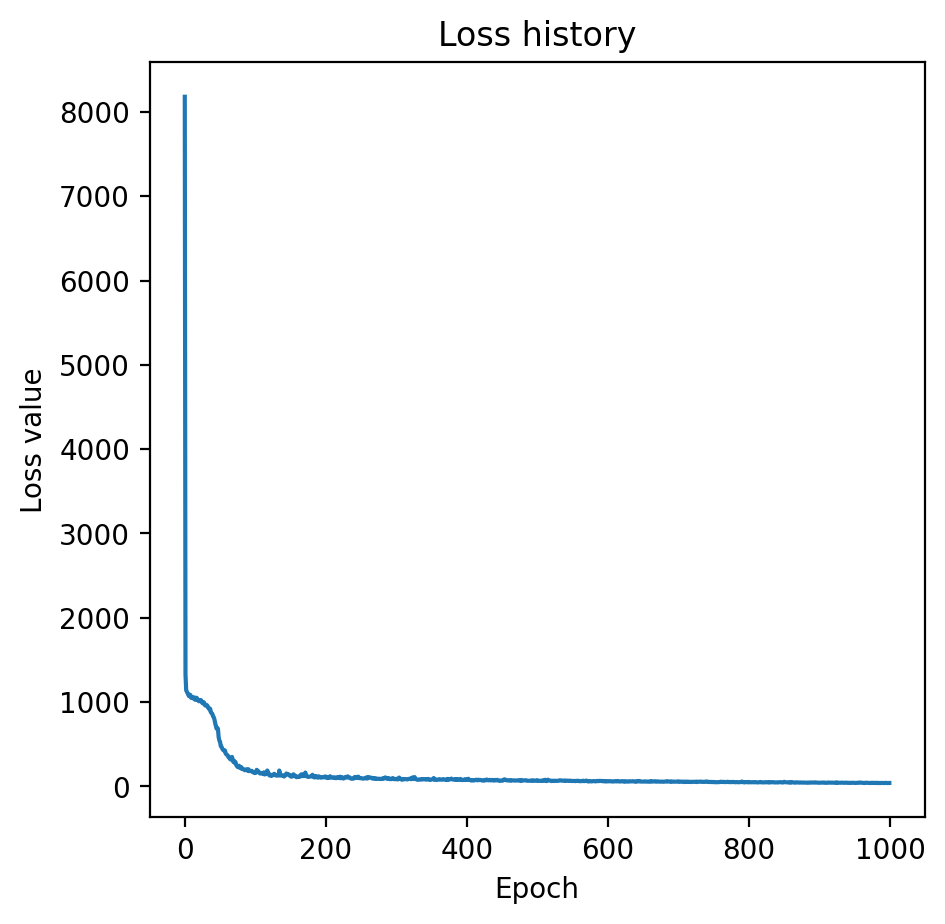

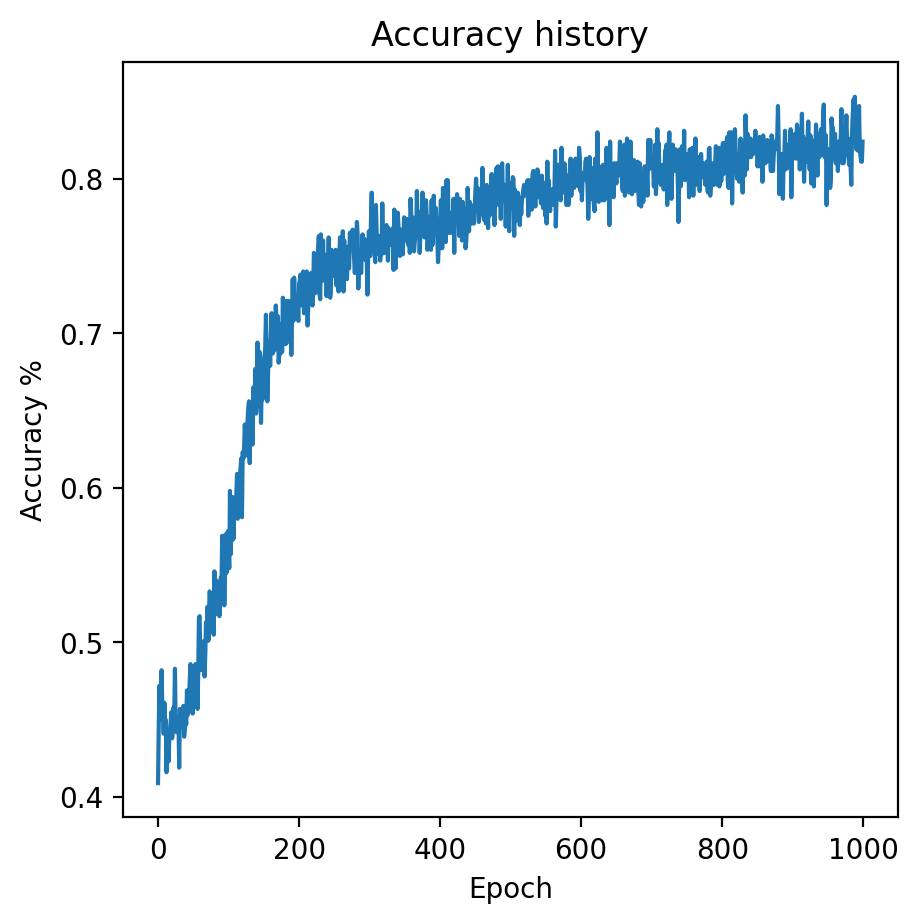

In [112]:
plt.plot(history.history['loss'])
plt.title('Loss history')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy history')
plt.ylabel('Accuracy ratio')
plt.xlabel('Epoch')
plt.show()

**Plotting example prediction from Testing images**

In [113]:
predicted_joints = model.predict(LSP_test["images"])

# Reshaping joints from (28) to (14, 2)
predicted_joints = predicted_joints.reshape((1000, 14, 2))

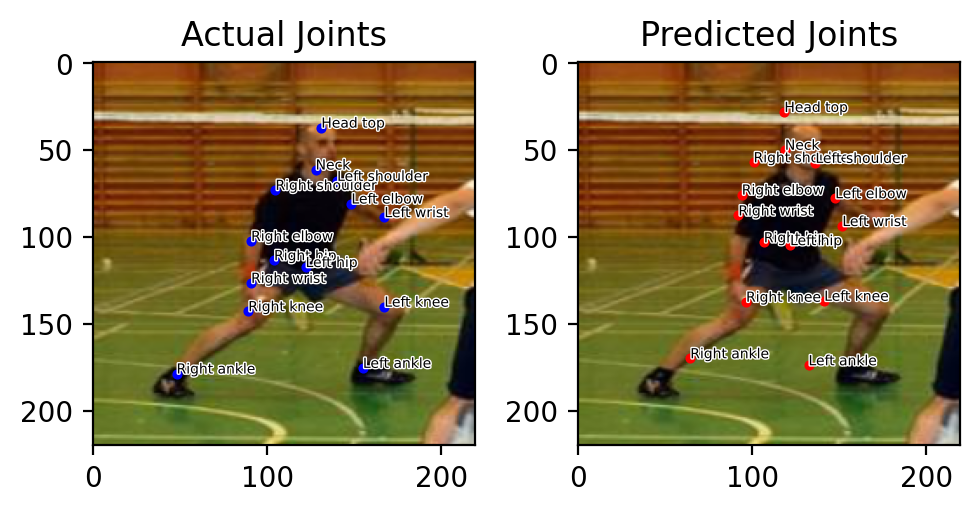

In [139]:
predicted_example = 109

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

ax1.imshow(LSP_test["images"][predicted_example])
ax1.scatter(LSP_test["joints"][predicted_example, :, 0], LSP_test["joints"][predicted_example, :, 1], s = 7, c = "blue")
ax1.set_title("Actual Joints")

ax2.imshow(LSP_test["images"][predicted_example])
ax2.scatter(predicted_joints[predicted_example, :, 0], predicted_joints[predicted_example, :, 1], s = 7, c = "red")
ax2.set_title("Predicted Joints")

for pos, joint in enumerate(joints):
  ax1.annotate(joint, (LSP_test["joints"][predicted_example, :, 0][pos], LSP_test["joints"][predicted_example, :, 1][pos]), 
               fontsize = 5, path_effects = [PathEffects.withStroke(linewidth = 1, foreground = "w")])
  
for pos, joint in enumerate(joints):
  ax2.annotate(joint, (predicted_joints[predicted_example, :, 0][pos], predicted_joints[predicted_example, :, 1][pos]), 
               fontsize = 5, path_effects = [PathEffects.withStroke(linewidth = 1, foreground = "w")])

fig.tight_layout()